A.Thiết kế Bộ Lọc FIR

1.Thiết kế bộ lọc FIR thông thấp (Low-pass filter)

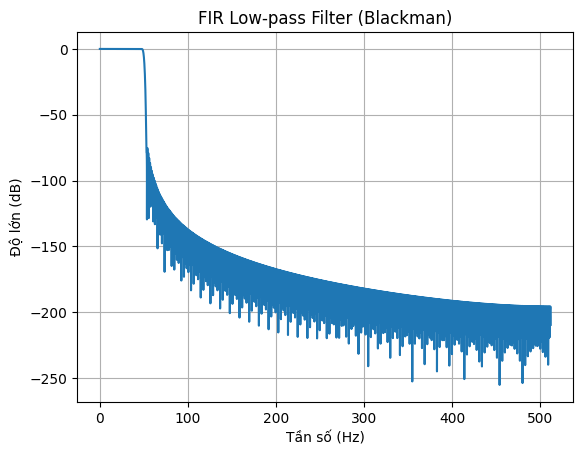

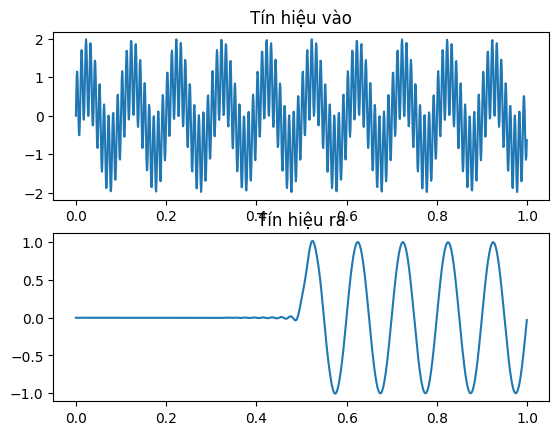

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

# Thông số thiết kế
fs = 1024  # Tần số lấy mẫu (Hz)
fc = 50    # Tần số cắt (Hz)
num_taps = 1024  # Độ dài bộ lọc

# Cửa sổ Blackman
fir_coeff = firwin(num_taps, fc, window='blackman', fs=fs)

w, h = freqz(fir_coeff, worN=8000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('FIR Low-pass Filter (Blackman)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Độ lớn (dB)')
plt.grid()
plt.show()

# Tín hiệu tổng hợp (10 Hz và 100 Hz)
t = np.arange(0, 1.0, 1.0 / fs)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t)

# Lọc tín hiệu
y = lfilter(fir_coeff, 1.0, x)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Tín hiệu vào')
plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.title('Tín hiệu ra')
plt.show()


2.Thiết kế bộ lọc FIR thông cao (High-pass filter)

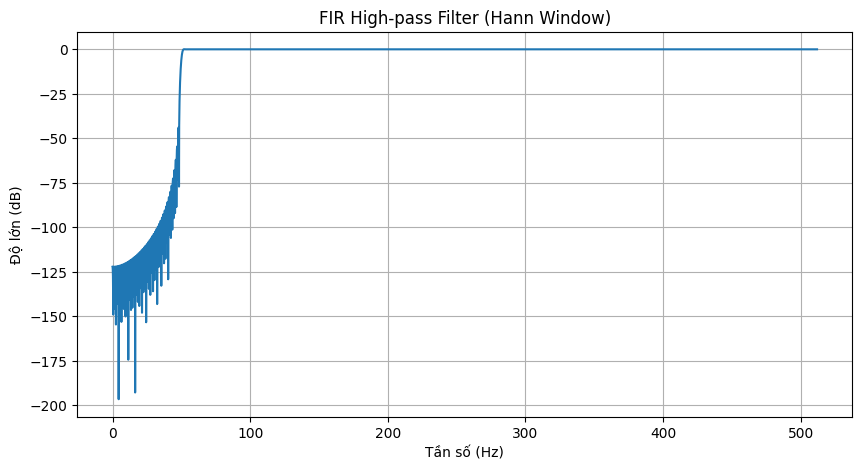

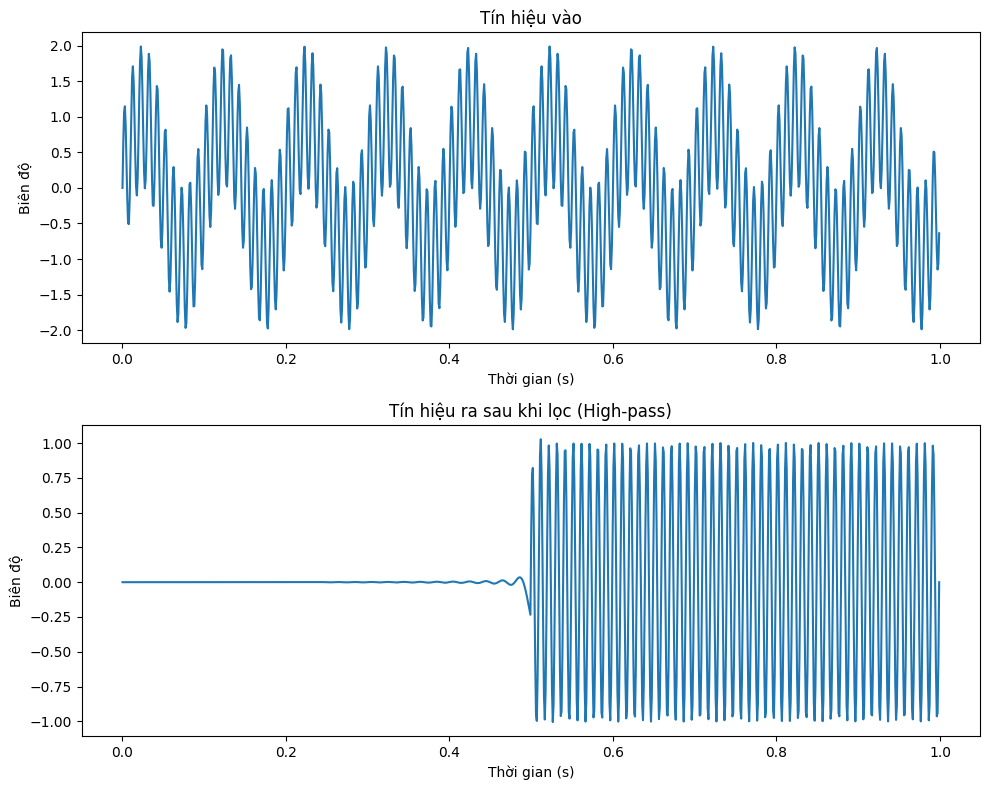

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

# Thông số thiết kế
fs = 1024  # Tần số lấy mẫu (Hz)
fc = 50    # Tần số cắt (Hz)
num_taps = 1023  # Độ dài bộ lọc (số lẻ để tránh lỗi Nyquist)

# Thiết kế FIR High-pass với cửa sổ Hann
fir_coeff_high = firwin(num_taps, fc, window='hann', fs=fs, pass_zero=False)

# Vẽ đáp ứng tần số (Frequency Response)
w, h = freqz(fir_coeff_high, worN=8000, fs=fs)
plt.figure(figsize=(10, 5))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('FIR High-pass Filter (Hann Window)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Độ lớn (dB)')
plt.grid()
plt.show()

# Tạo tín hiệu tổng hợp (10 Hz và 100 Hz)
t = np.arange(0, 1.0, 1.0 / fs)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t)

# Lọc tín hiệu qua bộ lọc thông cao
y_high = lfilter(fir_coeff_high, 1.0, x)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Tín hiệu vào')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')

plt.subplot(2, 1, 2)
plt.plot(t, y_high)
plt.title('Tín hiệu ra sau khi lọc (High-pass)')
plt.xlabel('Thời gian (s)')
plt.ylabel('Biên độ')

plt.tight_layout()
plt.show()


B. Phần 2: Thiết kế Bộ Lọc IIR

1. Thiết kế bộ lọc IIR thông thấp

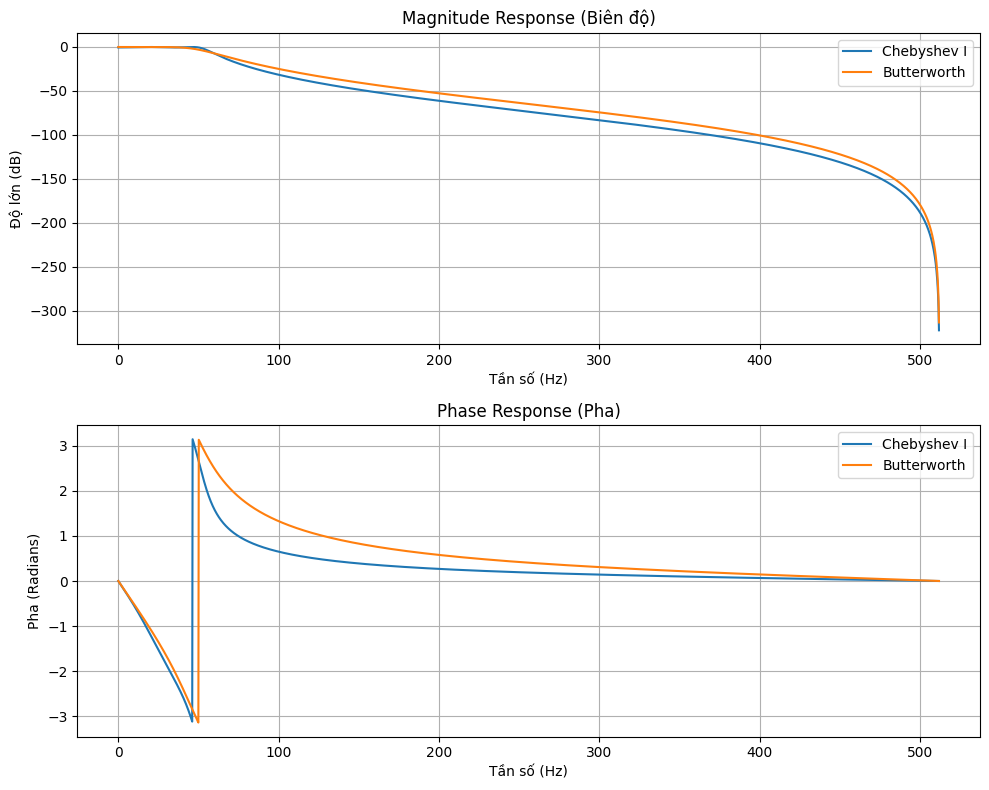

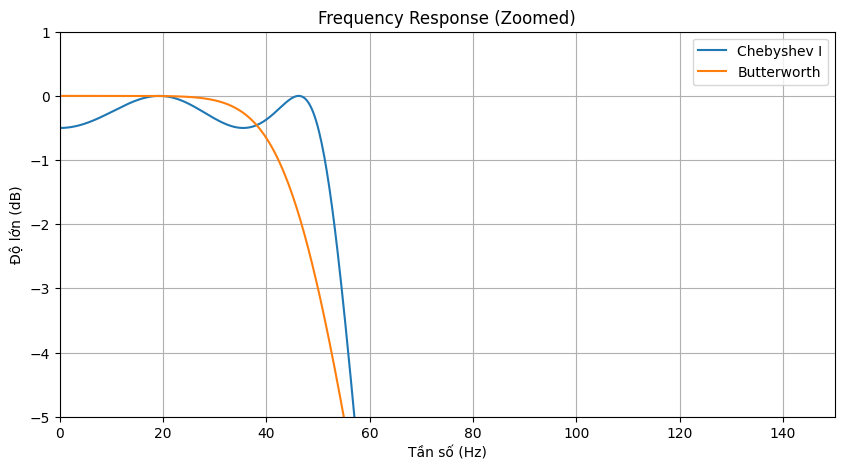

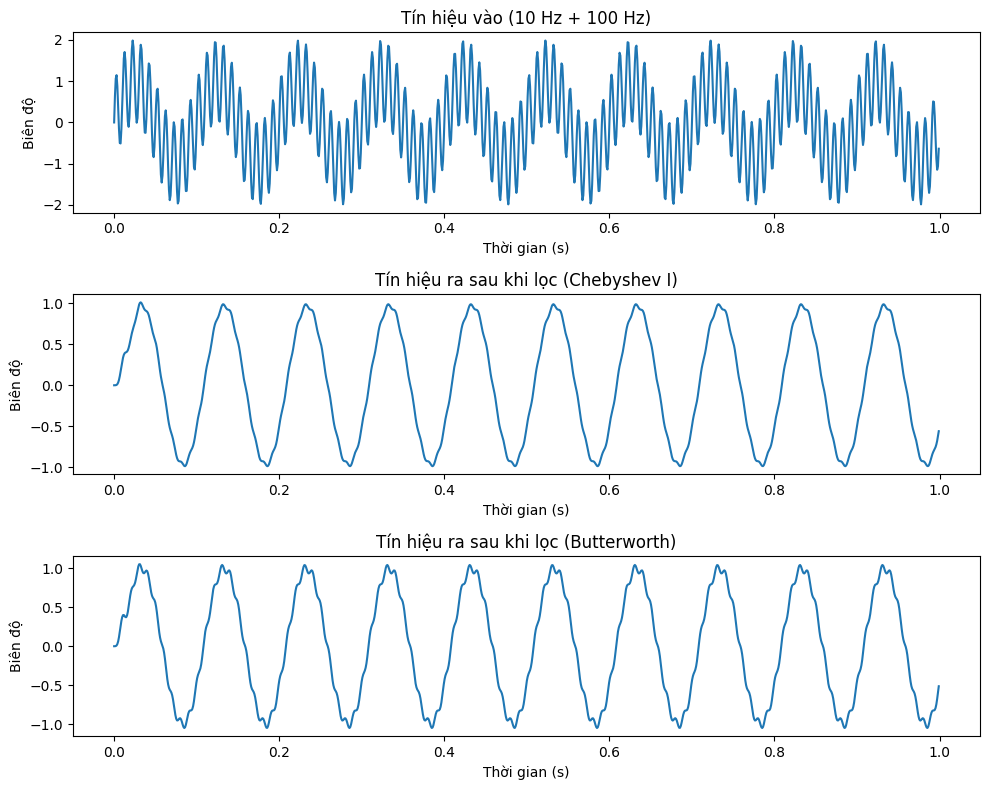

In [3]:
from scipy.signal import cheby1, butter, sosfilt, sosfreqz
import numpy as np
import matplotlib.pyplot as plt

# Thông số thiết kế
fs = 1024  # Tần số lấy mẫu (Hz)
fc = 50    # Tần số cắt (Hz)
order = 4  # Bậc bộ lọc

# Thiết kế bộ lọc Chebyshev loại I và Butterworth
sos_cheby = cheby1(order, 0.5, fc, btype='low', fs=fs, output='sos')
sos_butter = butter(order, fc, btype='low', fs=fs, output='sos')

# Vẽ đáp ứng biên độ và pha của cả hai bộ lọc
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for sos, label in [(sos_cheby, 'Chebyshev I'), (sos_butter, 'Butterworth')]:
    w, h = sosfreqz(sos, worN=2000, fs=fs)
    axs[0].plot(w, 20 * np.log10(abs(h)), label=label)
    axs[1].plot(w, np.angle(h), label=label)

# Biểu đồ đáp ứng biên độ
axs[0].set_title('Magnitude Response (Biên độ)')
axs[0].set_xlabel('Tần số (Hz)')
axs[0].set_ylabel('Độ lớn (dB)')
axs[0].grid()
axs[0].legend()

# Biểu đồ đáp ứng pha
axs[1].set_title('Phase Response (Pha)')
axs[1].set_xlabel('Tần số (Hz)')
axs[1].set_ylabel('Pha (Radians)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

# Vẽ đáp ứng tần số (Frequency Response) trong vùng quan sát từ -5 dB đến 1 dB
plt.figure(figsize=(10, 5))
for sos, label in [(sos_cheby, 'Chebyshev I'), (sos_butter, 'Butterworth')]:
    w, h = sosfreqz(sos, worN=2000, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h)), label=label)

plt.xlim(0, 150)  # Giới hạn tần số từ 0 đến 150 Hz
plt.ylim(-5, 1)   # Giới hạn biên độ từ -5 dB đến 1 dB
plt.title('Frequency Response (Zoomed)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Độ lớn (dB)')
plt.grid()
plt.legend()
plt.show()

# Tạo tín hiệu tổng hợp (10 Hz và 100 Hz)
t = np.arange(0, 1.0, 1.0 / fs)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t)

# Lọc tín hiệu với Chebyshev và Butterworth
y_cheby = sosfilt(sos_cheby, x)
y_butter = sosfilt(sos_butter, x)

# Vẽ tín hiệu ngõ vào và ngõ ra sau khi lọc
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Tín hiệu ngõ vào
axs[0].plot(t, x)
axs[0].set_title('Tín hiệu vào (10 Hz + 100 Hz)')
axs[0].set_xlabel('Thời gian (s)')
axs[0].set_ylabel('Biên độ')

# Tín hiệu ngõ ra - Chebyshev
axs[1].plot(t, y_cheby)
axs[1].set_title('Tín hiệu ra sau khi lọc (Chebyshev I)')
axs[1].set_xlabel('Thời gian (s)')
axs[1].set_ylabel('Biên độ')

# Tín hiệu ngõ ra - Butterworth
axs[2].plot(t, y_butter)
axs[2].set_title('Tín hiệu ra sau khi lọc (Butterworth)')
axs[2].set_xlabel('Thời gian (s)')
axs[2].set_ylabel('Biên độ')

plt.tight_layout()
plt.show()


2. Thiết kế bộ lọc IIR thông cao

C:\Users\Admin\AppData\Local\Temp\ipykernel_3300\2009312013.py:19: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(w, 20 * np.log10(abs(h)), label=label)


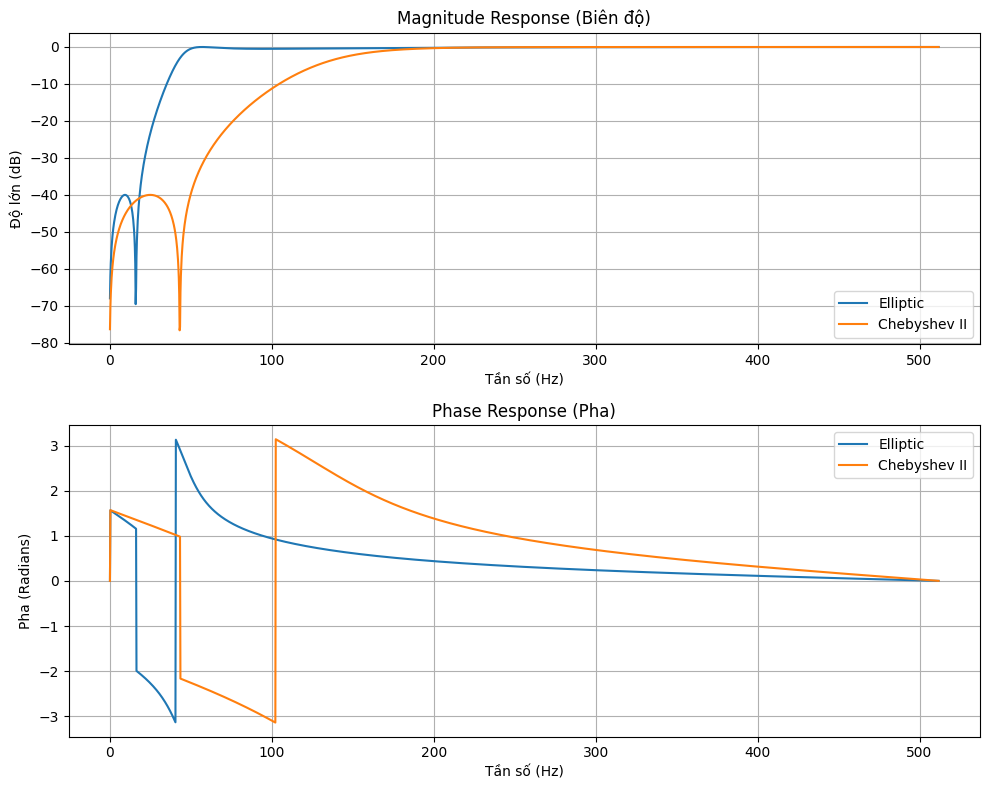

C:\Users\Admin\AppData\Local\Temp\ipykernel_3300\2009312013.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), label=label)


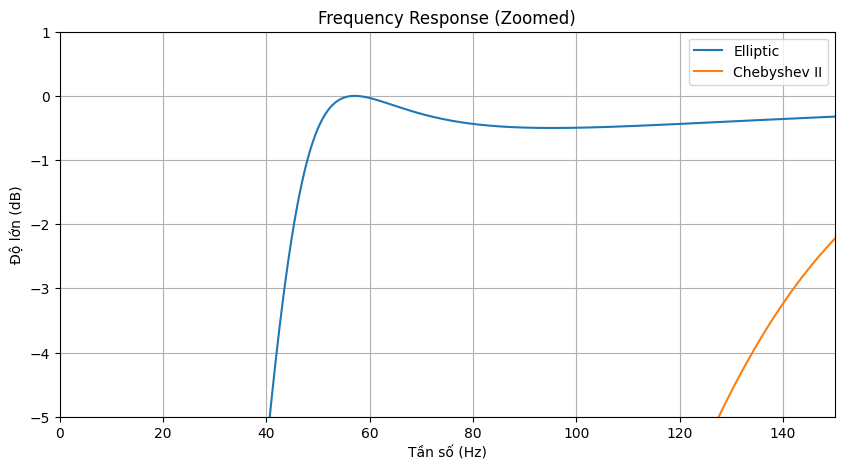

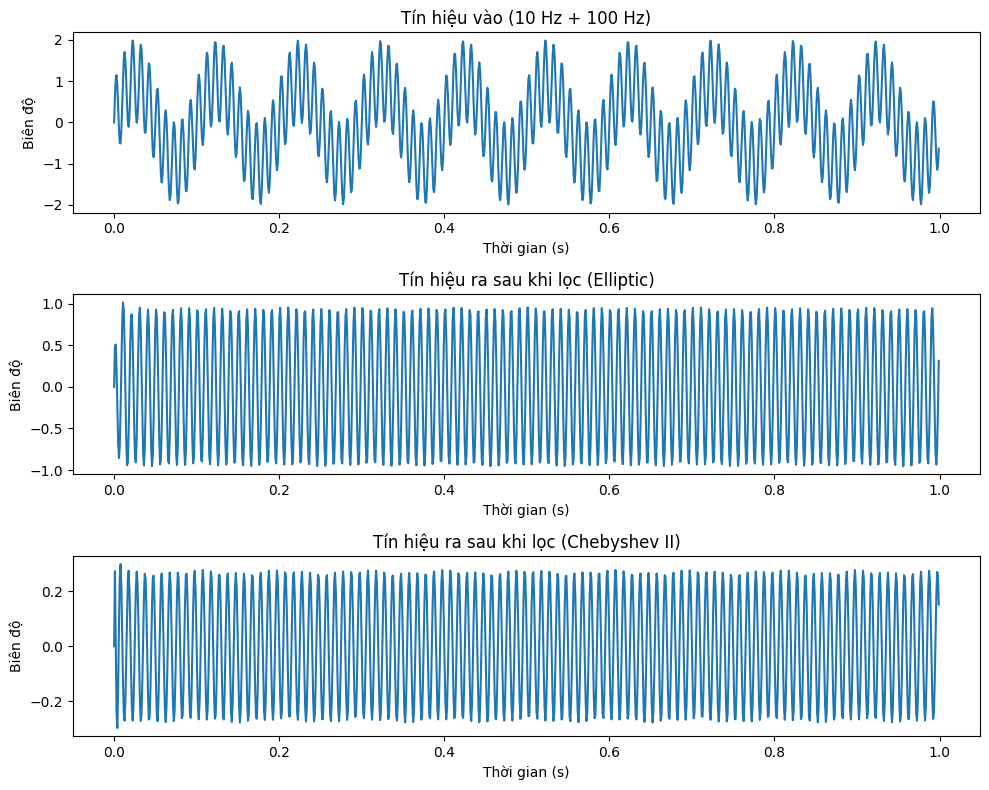

In [4]:
from scipy.signal import ellip, cheby2, sosfilt, sosfreqz
import numpy as np
import matplotlib.pyplot as plt

# Thông số thiết kế
fs = 1024  # Tần số lấy mẫu (Hz)
fc = 50    # Tần số cắt (Hz)
order = 3  # Bậc bộ lọc

# Thiết kế bộ lọc Elliptic và Chebyshev loại II
sos_ellip = ellip(order, 0.5, 40, fc, btype='high', fs=fs, output='sos')
sos_cheby2 = cheby2(order, 40, fc, btype='high', fs=fs, output='sos')

# Vẽ đáp ứng biên độ và pha của cả hai bộ lọc
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for sos, label in [(sos_ellip, 'Elliptic'), (sos_cheby2, 'Chebyshev II')]:
    w, h = sosfreqz(sos, worN=2000, fs=fs)
    axs[0].plot(w, 20 * np.log10(abs(h)), label=label)
    axs[1].plot(w, np.angle(h), label=label)

# Biểu đồ đáp ứng biên độ
axs[0].set_title('Magnitude Response (Biên độ)')
axs[0].set_xlabel('Tần số (Hz)')
axs[0].set_ylabel('Độ lớn (dB)')
axs[0].grid()
axs[0].legend()

# Biểu đồ đáp ứng pha
axs[1].set_title('Phase Response (Pha)')
axs[1].set_xlabel('Tần số (Hz)')
axs[1].set_ylabel('Pha (Radians)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

# Vẽ đáp ứng tần số trong vùng quan sát từ -5 dB đến 1 dB
plt.figure(figsize=(10, 5))
for sos, label in [(sos_ellip, 'Elliptic'), (sos_cheby2, 'Chebyshev II')]:
    w, h = sosfreqz(sos, worN=2000, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h)), label=label)

plt.xlim(0, 150)  # Giới hạn tần số từ 0 đến 150 Hz
plt.ylim(-5, 1)   # Giới hạn biên độ từ -5 dB đến 1 dB
plt.title('Frequency Response (Zoomed)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Độ lớn (dB)')
plt.grid()
plt.legend()
plt.show()

# Tạo tín hiệu tổng hợp (10 Hz và 100 Hz)
t = np.arange(0, 1.0, 1.0 / fs)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t)

# Lọc tín hiệu với Elliptic và Chebyshev II
y_ellip = sosfilt(sos_ellip, x)
y_cheby2 = sosfilt(sos_cheby2, x)

# Vẽ tín hiệu ngõ vào và ngõ ra sau khi lọc
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Tín hiệu ngõ vào
axs[0].plot(t, x)
axs[0].set_title('Tín hiệu vào (10 Hz + 100 Hz)')
axs[0].set_xlabel('Thời gian (s)')
axs[0].set_ylabel('Biên độ')

# Tín hiệu ngõ ra - Elliptic
axs[1].plot(t, y_ellip)
axs[1].set_title('Tín hiệu ra sau khi lọc (Elliptic)')
axs[1].set_xlabel('Thời gian (s)')
axs[1].set_ylabel('Biên độ')

# Tín hiệu ngõ ra - Chebyshev II
axs[2].plot(t, y_cheby2)
axs[2].set_title('Tín hiệu ra sau khi lọc (Chebyshev II)')
axs[2].set_xlabel('Thời gian (s)')
axs[2].set_ylabel('Biên độ')

plt.tight_layout()
plt.show()
